In [1]:
!pwd

/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io_experiments/notebooks


In [2]:
import dask
import dask.array as da
import graphviz
import sys
dask_io_path = '/home/user/Documents/workspace/bigdataneurolab/thesis/optimization_project/dask_io'
sys.path.insert(0, dask_io_path)
from dask_io.utils.get_arrays import get_dask_array_from_hdf5
from dask_io.cases.case_creation import get_arr_chunks

# Creating a sample array

# Loading sample arrray

In [5]:
input_array = '/run/media/user/HDD 1TB/data/sample_array_nochunk.hdf5'
input_array = get_dask_array_from_hdf5(input_array, '/data', logic_cs=(770, 605, 700))

Inspecting h5py file...
	Found object /data at key data
	 - Object type: dataset
	 - Physical chunks shape: None
	 - Compression: None
	 - Shape: (1540, 1210, 1400)
	 - Size: 2608760000
	 - Dtype: float16


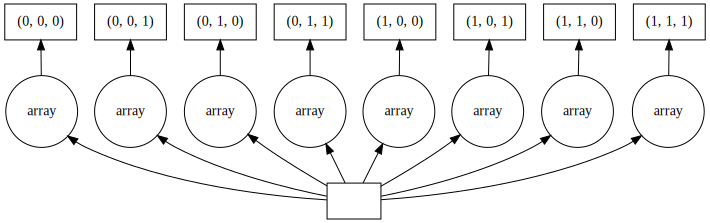

In [6]:
input_array.visualize(filename='../outputs/input_array.svg')

In [60]:
# use case 1
subarray = input_array[:1540, :520: 210]
subarray.dask.dicts.keys()
subarray = subarray + 25
subarray.dask.dicts.keys()
subarray.dask.dicts['add-7c83a918eb5b1b9847698e0d800caf0c']
subarray.visualize(filename='../outputs/input_array_compute.svg')
d = subarray.dask.dicts
d.keys()
from dask.optimization import cull
dsk1, dependencies = cull(d, ['add-7c83a918eb5b1b9847698e0d800caf0c'])
from dask.array import Array
import numpy as np
newarr = Array(dsk1, "myarray", chunks=((770, 770), (3,), (700, 700)), dtype=np.float64)
newarr.visualize(filename='../outputs/input_array_compute.svg')

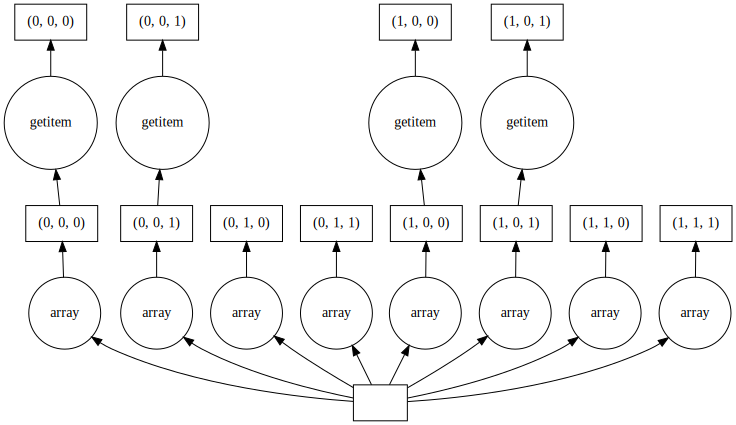

In [70]:
subarray = input_array[:1540, :520: 210]
subarray.visualize(filename='../outputs/input_array_compute.svg')

In [86]:
from dask_io.optimizer.modifiers import get_graph_from_dask

In [87]:
remade_graph = get_graph_from_dask(subarray.dask.dicts)

In [88]:
remade_graph.keys()

dict_keys([('getitem-10f84f97b992edb570f1efff03b6c6f8', 0, 0, 0), ('getitem-10f84f97b992edb570f1efff03b6c6f8', 0, 0, 1), ('getitem-10f84f97b992edb570f1efff03b6c6f8', 1, 0, 0), ('getitem-10f84f97b992edb570f1efff03b6c6f8', 1, 0, 1), ('array-27b18fbd601a44bad2ff55e943959e72', 0, 0, 0), ('array-27b18fbd601a44bad2ff55e943959e72', 0, 0, 1), ('array-27b18fbd601a44bad2ff55e943959e72', 0, 1, 0), ('array-27b18fbd601a44bad2ff55e943959e72', 0, 1, 1), ('array-27b18fbd601a44bad2ff55e943959e72', 1, 0, 0), ('array-27b18fbd601a44bad2ff55e943959e72', 1, 0, 1), ('array-27b18fbd601a44bad2ff55e943959e72', 1, 1, 0), ('array-27b18fbd601a44bad2ff55e943959e72', 1, 1, 1), 'array-original-27b18fbd601a44bad2ff55e943959e72'])

In [92]:
outputs = [('getitem-10f84f97b992edb570f1efff03b6c6f8', 0, 0, 0), ('getitem-10f84f97b992edb570f1efff03b6c6f8', 0, 0, 1), ('getitem-10f84f97b992edb570f1efff03b6c6f8', 1, 0, 0), ('getitem-10f84f97b992edb570f1efff03b6c6f8', 1, 0, 1)]

In [93]:
from dask.optimization import cull
dsk1, dependencies = cull(remade_graph, outputs)

In [95]:
dsk1

{('getitem-10f84f97b992edb570f1efff03b6c6f8',
  1,
  0,
  0): [('array-27b18fbd601a44bad2ff55e943959e72', 1, 0, 0)],
 ('getitem-10f84f97b992edb570f1efff03b6c6f8',
  1,
  0,
  1): [('array-27b18fbd601a44bad2ff55e943959e72', 1, 0, 1)],
 ('getitem-10f84f97b992edb570f1efff03b6c6f8',
  0,
  0,
  1): [('array-27b18fbd601a44bad2ff55e943959e72', 0, 0, 1)],
 ('getitem-10f84f97b992edb570f1efff03b6c6f8',
  0,
  0,
  0): [('array-27b18fbd601a44bad2ff55e943959e72', 0, 0, 0)],
 ('array-27b18fbd601a44bad2ff55e943959e72',
  1,
  0,
  0): ['array-original-27b18fbd601a44bad2ff55e943959e72'],
 ('array-27b18fbd601a44bad2ff55e943959e72',
  1,
  0,
  1): ['array-original-27b18fbd601a44bad2ff55e943959e72'],
 ('array-27b18fbd601a44bad2ff55e943959e72',
  0,
  0,
  1): ['array-original-27b18fbd601a44bad2ff55e943959e72'],
 ('array-27b18fbd601a44bad2ff55e943959e72',
  0,
  0,
  0): ['array-original-27b18fbd601a44bad2ff55e943959e72'],
 'array-original-27b18fbd601a44bad2ff55e943959e72': [<HDF5 dataset "data": shape

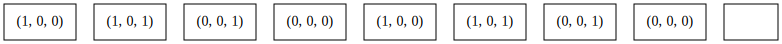

In [94]:
# create new array
from dask.array import Array
import numpy as np
newarr = Array(dsk1, "myarray", chunks=((770, 770), (3,), (700, 700)), dtype=np.float64)
newarr.visualize(filename='../outputs/input_array_compute.svg')

# Splitting sample array

splitting inside 1 hdf5 containing multiple datasets

In [14]:
arr_list = get_arr_chunks(input_array)
keys = list(range(len(arr_list)))
keys = list(map(lambda e: '/data/' + str(e), keys))
out_path = '/run/media/user/HDD 1TB/data/split_file_content.hdf5'
print(keys)

['/data/0', '/data/1', '/data/2', '/data/3', '/data/4', '/data/5', '/data/6', '/data/7']


In [ ]:
da.to_hdf5(out_path, dict(zip(keys, arr_list)))

splitting into several different files

# Merging sample array

In [ ]:
dask_arrays = []
for fn in filenames:
    f = h5py.File(fn)
    d = f['/data']
    array = da.from_array(d, chunks=(1000, 1000))
    dask_arrays.append(array)

x = da.concatenate(dask_arrays, axis=0)